# Learning Predictive Representations with SR

Here we will use a simple class that uses only SR, not SR-DYNA, to learn predictive representations that guide its decisions. We will compare the number of episodes it takes the algorithm to converge under different learning rates and discount parameters. In another notebook we will compare this outcome to SR-DYNA.

For simplicity we will look at Experiment 1 from Momennejad et al. 2017, where there are no actions to take during learning and the agent is moved from state to state. The only choice is during test: a decision between the two sequences. 

Below the agent will learn SR, compute value function using this learned information, and then the decision will pick the starting state with the highest value.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math 
from SRclass_nathum_exp1 import SRclass_nathum_exp1
from SR_no_action import SR_no_action
import ida_envs
from mpl_toolkits import mplot3d # for 3D plot

# Plot the graph of Experiment 1
This function uses the graphviz librart to plot the graph of the experiment as a separate window and saves it as pdf. 

In [3]:
ida_envs.plot_env1()

# Train an SR agent to make decisions in the environment
1) Set up the environment envstep
2) Use a function that (a) initializes an agent from the class SR_no_action given learning rate (alpha) and discount (gamma) parameters, and (b) has the agent interact with the environment and learn what to do (cf: SRclass_nathum_exp1.py)
3) Compute the value of options and see which starting state the agent uses. 

34  training episodes/iterations done
The best starting state is: 0 or state 1
################################
gamma: 0.2, alpha: 0.6
Best starting state is: 0 or state 1


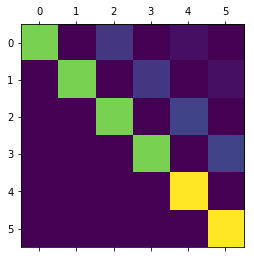

In [23]:
# Set discount factor & learning rate
gamma, alpha = 0.2, .6
p_sample = [.5,.5] # probability of sampling each starting state 
verbose = 0

# 1) create the environment
envstep = ida_envs.generate_nathumbeh_env1()

# 2) create SR agent, let it learn the environment
M, W, mem, total_episodes = SRclass_nathum_exp1(envstep, gamma, alpha, p_sample, verbose)

# 3) compute value using SR & value weights
v=M@W 
print(f'The best starting state is: {np.argmax([v[0],v[1]])} or state {np.argmax([v[0],v[1]])+1}')
print('################################')
print(f'gamma: {gamma}, alpha: {alpha}')
print(f'Best starting state is: {np.argmax([v[0],v[1]])} or state {np.argmax([v[0],v[1]])+1}')
plt.matshow(M)

# How long does learning take?

There are two parameters involved in how long it takes to learn: the learning rate and the discount factor or the scale of the predictive representations that are learned. Below we generate many successor representation matrices with different alpha and gamma parameters, compute the number of episodes it takes to converge in each case, and present the 3D plot for comparison.

In [130]:
alphas = [.1, .2, .3, .4, .6, .8]
gammas = [.1, .2, .3, .4, .6, .8]

def f(X , Y):
    # [x[:] for x in [[1] * 10] * 10]
    f= np.zeros(shape=X.shape)
    ax = 0
    #print(np.shape(f))
    for alpha in X[0]:  
        gx = 0
        #print(alpha)
        for gamma in Y[0]:            
            print(f'Learning for alpha: {alpha} and gamma: {gamma}')
            M, W, mem, total_episodes = SRclass_nathum_exp1(envstep, gamma, alpha, p_sample, verbose)
            f[ax][gx]=total_episodes
            gx+=1
        ax +=1        
    return f

# for the 3D plot
X, Y = np.meshgrid(alphas, gammas)
Z = f(X, Y)


Learning for alpha: 0.1 and gamma: 0.1
180  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
193  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
179  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
194  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
173  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
202  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
96  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
101  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
102  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
99  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
107  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
66  training episodes/iterat

Minimum number of episodes to convergence: 14.0
Max number of episodes to convergence: 202.0


34

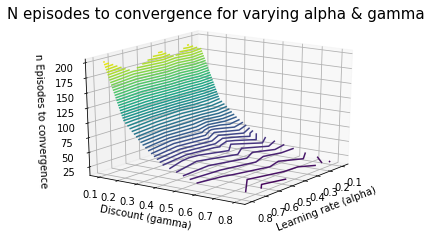

In [131]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('Learning rate (alpha)')
ax.set_ylabel('Discount (gamma)')
ax.set_zlabel('n Episodes to convergence');
print(f'Minimum number of episodes to convergence: {np.min(Z)}')
print(f'Max number of episodes to convergence: {np.max(Z)}')
ax.set_title('N episodes to convergence for varying alpha & gamma', fontsize=15);
np.argmin(Z)

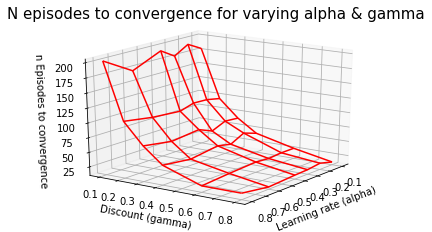

In [132]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.plot_wireframe(X, Y, Z, color='red')
ax.set_xlabel('Learning rate (alpha)')
ax.set_ylabel('Discount (gamma)')
ax.set_zlabel('n Episodes to convergence');
ax.set_title('N episodes to convergence for varying alpha & gamma', fontsize=15);

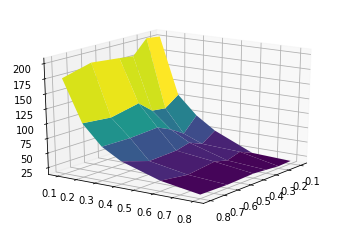

In [123]:
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')